In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import random

## Задания для выполнения

### 1. Загрузите датасет Olivetti faces

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/tatyana/scikit_learn_data


### 2. Познакомьтесь с описанием и структурой датасета

* Каждая строка соответствует искаженному изображению лица исходного размера 64 x 64 пикселя. (.data)

* Каждая строка представляет собой изображение лица, соответствующее одному из 40 объектов набора данных. (.images)

* Метки класса, связанные с каждым изображением лица. Эти метки находятся в диапазоне от 0 до 39 и соответствуют идентификаторам объектов. (.target)

* Описание измененного набора данных Olivetti Faces. (.DESCR)

In [ ]:
faces.data[0] 

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [ ]:
faces.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [ ]:
faces.target[0]

0

In [ ]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

### 3. Выведите информацию о количественных параметрах датасета;

In [ ]:
faces.data.shape

(400, 4096)

In [ ]:
faces.images.shape

(400, 64, 64)

In [ ]:
faces.target.shape

(400,)

In [ ]:
np.unique(faces.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

### 4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

In [ ]:
random_faces_ind = random.choices(range(faces.images.shape[0]), k=3)

In [ ]:
random_faces_ind

[38, 338, 241]

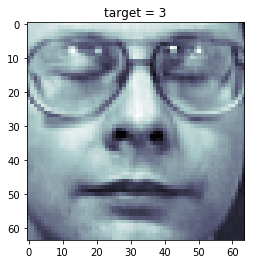

In [ ]:
plt.imshow(faces.images[random_faces_ind[0]], cmap=plt.cm.bone)
plt.title(f'target = {faces.target[random_faces_ind[0]]}');

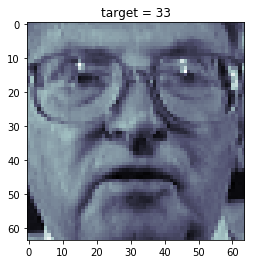

In [ ]:
plt.imshow(faces.images[random_faces_ind[1]], cmap=plt.cm.bone)
plt.title(f'target = {faces.target[random_faces_ind[1]]}');

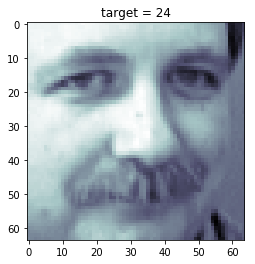

In [ ]:
plt.imshow(faces.images[random_faces_ind[2]], cmap=plt.cm.bone)
plt.title(f'target = {faces.target[random_faces_ind[2]]}');

### 5. Разделите эти данные на тестовую и обучающую выборки;


In [ ]:
X = faces.data
y = faces.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

### Задания 6-9 входят также в дополнительные задания. Поэтому чтобы не делать одну и ту же работу дважды, я выполню дополнительные (SVC, который просят обучить и оценить в заданиях 6-9, входит в дополнительные задания)

## Дополнительные задания

### 1. Постройте модели классификации на основе следующих методов:

a. логистическая регрессия (LogisticRegression);

b. метод опорных векторов с гауссовым ядром (SVC);

c. метод опорных векторов с полиномиальным ядром (SVC);

d. метод k ближайших соседей (KNeighborsClassifier);

e. многослойный перцептрон (MLP);

f. другие методы по желанию

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import (train_test_split, cross_validate,
                                     learning_curve, GridSearchCV, KFold)
from sklearn.metrics import (make_scorer, accuracy_score,
                             confusion_matrix, f1_score,
                             precision_score, recall_score,
                             roc_auc_score)

In [ ]:
import pandas as pd

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)

In [ ]:
models = {'LogisticRegression': LogisticRegression(random_state=42, n_jobs=2),
          'SVC_poly': SVC(kernel='poly', random_state=42),
          'SVC_g': SVC(kernel='rbf', random_state=42),
          'KNeighborsClassifier': KNeighborsClassifier(n_jobs=2),
          'MLP': MLPClassifier(random_state=42, max_iter=400),
          'RandomForestClassifier': RandomForestClassifier(n_jobs=2)}

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='macro'),
           'recall' : make_scorer(recall_score, average='macro'),
           'f1': make_scorer(f1_score, average='macro')}

In [ ]:
res_metrics = dict()
for name_model, model in models.items():
    res_metrics[name_model] = cross_validate(model, X_train, y_train, verbose=2,
                                             n_jobs=-1, scoring=scoring, cv=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.6s finished


### 2. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

In [ ]:
analysis = []
for clf, met in res_metrics.items():
    analysis.append([])
    analysis[-1].append(clf)
    analysis[-1].extend([np.mean(met['test_accuracy']),
                         np.mean(met['test_precision']),
                         np.mean(met['test_recall']),
                         np.mean(met['test_f1'])])

In [ ]:
col = ['model', 'accuracy', 'precision', 'recall', 'f1']
res = pd.DataFrame(analysis, columns=col)

In [ ]:
res

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.922222,0.927083,0.920139,0.908214
1,SVC_poly,0.900000,0.904306,0.897917,0.883161
2,SVC_g,0.866667,0.876713,0.859028,0.847698
3,KNeighborsClassifier,0.780556,0.805337,0.772917,0.758048
4,MLP,0.516667,0.508919,0.512500,0.469891
5,RandomForestClassifier,0.888889,0.904444,0.888889,0.877229


In [ ]:
def highlight_max(s, props=''):
    """
    Highlights the maximum values in colour.
    """
    return np.where(s == np.nanmax(s.values), props, '')

In [ ]:
res_c = res.iloc[:, 1:].style.apply(highlight_max, props='color:green', axis=0)
res_c

,accuracy,precision,recall,f1
0,0.922222,0.927083,0.920139,0.908214
1,0.900000,0.904306,0.897917,0.883161
2,0.866667,0.876713,0.859028,0.847698
3,0.780556,0.805337,0.772917,0.758048
4,0.516667,0.508919,0.512500,0.469891
5,0.888889,0.904444,0.888889,0.877229


In [ ]:
test_score = dict()
for name_model, model in models.items():
    model.fit(X_train, y_train)
    test_score[name_model] = f1_score(y_test, model.predict(X_test), average='macro')

/Users/tatyana/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
test_score

{'LogisticRegression': 1.0,
 'SVC_poly': 1.0,
 'SVC_g': 0.9523809523809523,
 'KNeighborsClassifier': 0.7333333333333333,
 'MLP': 0.8494252873563218,
 'RandomForestClassifier': 0.9310344827586207}

На мой взгляд, стоит выбрать логистическую регрессию, она показала наилучшие результаты по всем метрикам. Также хорошие результаты показали себя все остальные модели, кроме, MLP (однако мы видим, что он не успел обучиться. Исправим это ниже).

### 3. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.


In [ ]:
from itertools import product

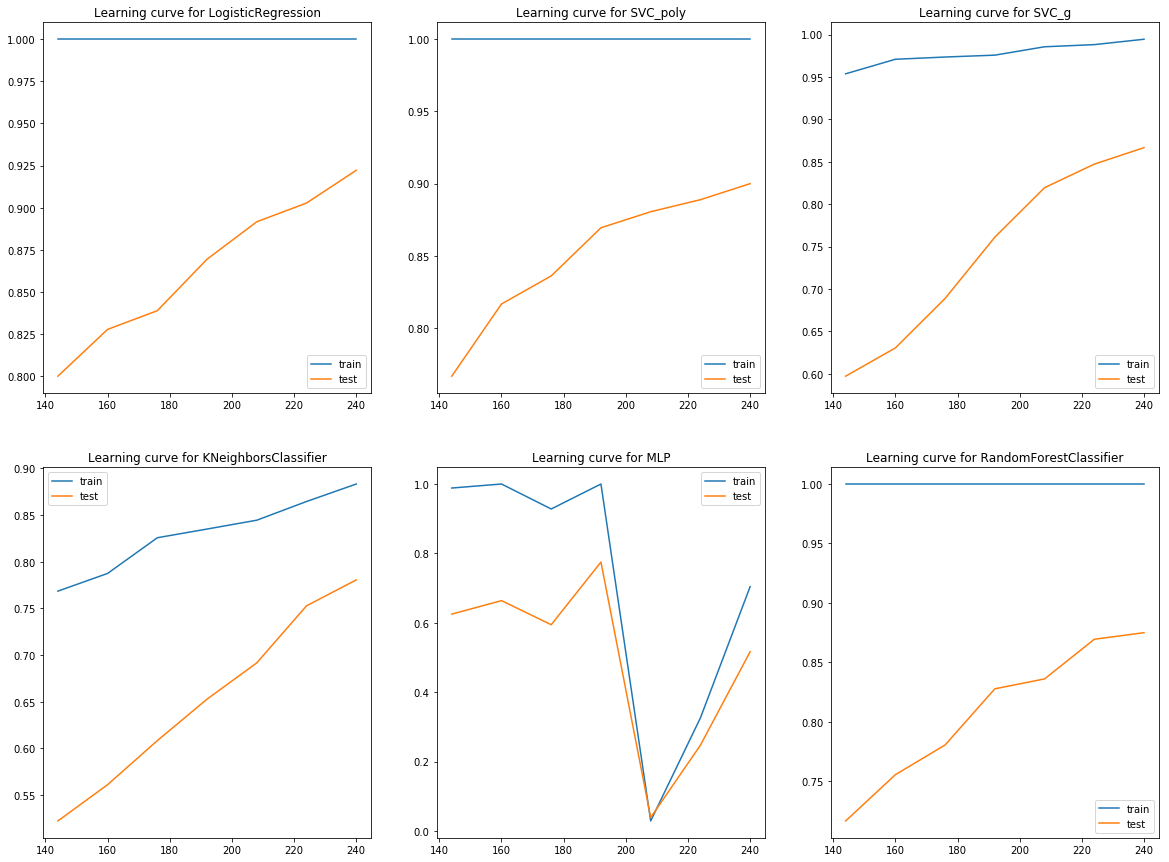

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ind_sub = list(product(range(3), repeat=2))
ts = np.linspace(0.6, 1, 7)

for i, item in enumerate(models.items()):
    name, model = item
    title = f'Learning curve for {name}'
    train_sz, train_score, test_score = learning_curve(model, X_train, y_train,
                                                       cv=3, random_state=42,
                                                       scoring=scoring['accuracy'],
                                                       train_sizes=ts,
                                                       n_jobs=-1)
    x, y = train_sz, np.mean(train_score, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='train')
    x, y = train_sz, np.mean(test_score, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='test')
    axes[ind_sub[i][0], ind_sub[i][1]].legend()
    axes[ind_sub[i][0], ind_sub[i][1]].set_title(title)

MlP недообучен. А вот все остальные модели переобучены. Хотя у KNN даже начал уменьшаться зазор (качество на тесте и трейне стало меньше отличаться).

In [ ]:
param_model = {'LogisticRegression': {'penalty': ['l2', 'none'],
                                      'C': [0.1, 1, 10],
                                      'max_iter': [250, 300]},
              
               'SVC_poly': {'C': [1, 10, 15], 
                            'degree': [2, 3, 4]},
              
               'SVC_g': {'C': [1, 10, 15]},
              
               'KNeighborsClassifier': {'n_neighbors' : np.arange(5, 15, 3),
                                        'weights': ['uniform', 'distance']},
              
               'MLP': {'early_stopping': [False, True],
                       'n_iter_no_change': [5, 10, 15],
                       'max_iter': [400, 600], 
                       'hidden_layer_sizes': [(100,), (200,), (100, 50)]},

               'RandomForestClassifier': {'n_estimators': [10, 50, 100],
                                          'max_depth': [None, 3, 5, 10],
                                          'max_leaf_nodes': [None, 5, 10, 50],
                                          'max_features': ['log2', 'sqrt']}}

In [ ]:
res_gscv = dict()
for name_model, model in models.items():
    gscv = GridSearchCV(model, param_model[name_model], 
                        cv=3, n_jobs=-1, verbose=3, 
                        scoring=scoring['f1'], 
                        error_score='raise')
    gscv.fit(X_train, y_train)
    res_gscv[name_model] = [gscv.best_params_, gscv.best_score_]

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [ ]:
new = []
for mod, best in res_gscv.items():
    new.append([mod])
    new[-1].extend(best)

res_new = pd.DataFrame(new, columns=['cls', 'param', 'f1'])

In [ ]:
res_new

,cls,param,f1
0,LogisticRegression,"{'C': 10, 'max_iter': 250, 'penalty': 'l2'}",0.910774
1,SVC_poly,"{'C': 1, 'degree': 2}",0.889094
2,SVC_g,{'C': 10},0.880972
3,KNeighborsClassifier,"{'n_neighbors': 5, 'weights': 'distance'}",0.807418
4,MLP,"{'early_stopping': False, 'hidden_layer_sizes'...",0.892923
5,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'm...",0.884312


In [ ]:
res

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.922222,0.927083,0.920139,0.908214
1,SVC_poly,0.900000,0.904306,0.897917,0.883161
2,SVC_g,0.866667,0.876713,0.859028,0.847698
3,KNeighborsClassifier,0.780556,0.805337,0.772917,0.758048
4,MLP,0.380556,0.330388,0.384028,0.323322
5,RandomForestClassifier,0.891667,0.904167,0.890278,0.881210


Ну, f1-score стал получше у всех, кроме KNN. Однако качество улучилось несильно (кроме MLP). Скорее всего, не получилось исправить переобучение для большинства моделей. 

In [ ]:
res_gscv['MLP'][0]

{'early_stopping': False,
 'hidden_layer_sizes': (200,),
 'max_iter': 600,
 'n_iter_no_change': 10}

In [ ]:
new_model = {'LogisticRegression': LogisticRegression(n_jobs=2, random_state=42, 
                                                      **res_gscv['LogisticRegression'][0]),
             
             'SVC_poly': SVC(kernel='poly', random_state=42,
                            **res_gscv['SVC_poly'][0]),
             
             'SVC_g': SVC(random_state=42,
                         **res_gscv['SVC_g'][0]),
             
             'KNeighborsClassifier': KNeighborsClassifier(n_jobs=2,
                                                         **res_gscv['KNeighborsClassifier'][0]),
             
             'MLP': MLPClassifier(random_state=42, max_iter=800,
                                 **{'early_stopping': False,
                                    'hidden_layer_sizes': (200,),
                                    'n_iter_no_change': 10}),
             
             'RandomForestClassifier': RandomForestClassifier(n_jobs=2,
                                                             **res_gscv['RandomForestClassifier'][0])}

[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:   36.0s remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:    1.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:    1.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:  1.1min remaining:   57.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [144 160 176 192 208 224 240]


[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:    1.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.5s finished


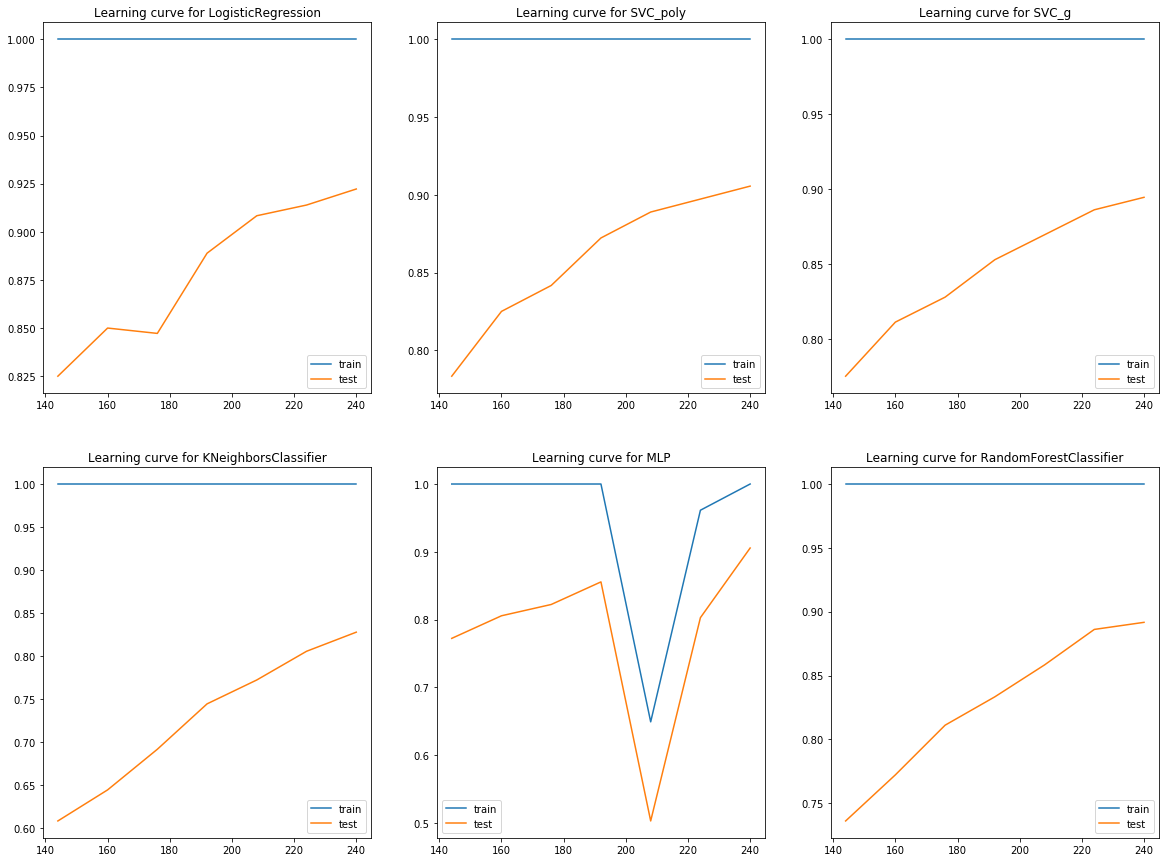

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ind_sub = list(product(range(3), repeat=2))
ts = np.linspace(0.6, 1, 7)

for i, item in enumerate(new_model.items()):
    name, model = item
    title = f'Learning curve for {name}'
    train_sz, train_score, test_score = learning_curve(model, X_train, y_train,
                                                       cv=3, random_state=42,
                                                       scoring=scoring['accuracy'],
                                                       train_sizes=ts,
                                                       n_jobs=-1, verbose=2)
    x, y = train_sz, np.mean(train_score, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='train')
    x, y = train_sz, np.mean(test_score, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='test')
    axes[ind_sub[i][0], ind_sub[i][1]].legend()
    axes[ind_sub[i][0], ind_sub[i][1]].set_title(title)

Видим, что все плохо. Модели все еще переобучены. Надо пробовать как-то иначе выставлять гиперпараметры. 

### 4. Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.


Сделаем замеры на обучении исходных моделей, до подбора параметров.

In [ ]:
time_fit = dict()
for name_model, model in models.items():
    t1 = time.time()
    model.fit(X_train, y_train)
    t2 = time.time()
    time_fit[name_model] = t2 - t1

/Users/tatyana/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
time_fit

{'LogisticRegression': 3.4866859912872314,
 'SVC_poly': 0.3064389228820801,
 'SVC_g': 0.4084327220916748,
 'KNeighborsClassifier': 0.0016016960144042969,
 'MLP': 9.609920024871826,
 'RandomForestClassifier': 1.1974279880523682}

In [ ]:
pd.DataFrame.from_dict(time_fit, orient='index', columns=['time'])

,time
LogisticRegression,3.486686
SVC_poly,0.306439
SVC_g,0.408433
KNeighborsClassifier,0.001602
MLP,9.609920
RandomForestClassifier,1.197428


Быстрее всего обучился KNN, дольше всего обучался MLP. Причем MLP не успел дообучиться и покажет плохое качество на тесте. Из таблицы качества res мы видели, что логистическая регрессия и SVM с полиномиальным ядром показывали сравнимо одинаковое качество. Вот только логистическая регрессия более, чем в 3 раза дольше обучается. Возможно, имеет смысл отдать предпочтение SVC_poly

### Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib, добавив над изображениями надпись, содержащую информацию о названии предсказанного и правильного классов, а также выделив изображение зеленой рамкой, если класс предсказан верно, и красной рамкой в противном случае.

In [ ]:
def plot_framed_face(y_true, y_hat, i):
    fig, axes = plt.subplots()
    if y_true[i] == y_hat[i]:
        col = 'green'
    else:
        col = 'red'
    fig.patch.set_linewidth(10)
    fig.patch.set_edgecolor(col)
    plt.imshow(faces.images[i], cmap=plt.cm.bone)
    plt.title(f'True: {y_true[i]}\nPredict: {y_hat[i]}')

In [ ]:
cls = SVC(kernel='poly', random_state=42).fit(X_train, y_train)

In [ ]:
y_hat = cls.predict(X_test)

In [ ]:
y_hat

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14])

In [ ]:
y_test

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14])

In [ ]:
f1_score(y_test, y_hat, average='macro')  # ну... мы все предсказали верно... 

1.0

In [ ]:
random_faces_ind = random.choices(range(len(y_hat)), k=3)

In [ ]:
random_faces_ind

[38, 13, 3]

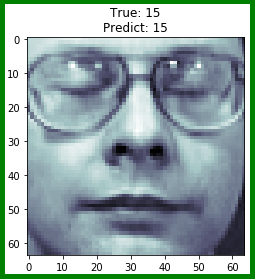

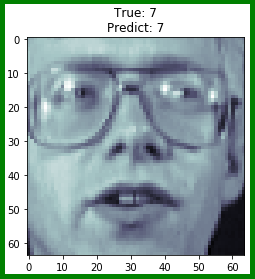

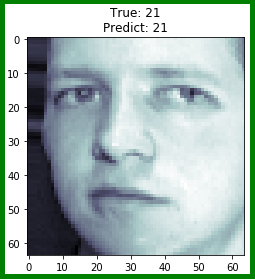

In [ ]:
for ind in random_faces_ind:
    plot_framed_face(y_test, y_hat, ind)